In [11]:
import numpy as np
import pandas as pd
from IPython.display import display 

# Load the online news dataset
data = pd.read_csv("OnlineNewsPopularity.csv")

display(data)

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.700000,-0.350000,-0.600000,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.700000,-0.118750,-0.125000,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.000000,-0.466667,-0.800000,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.800000,-0.369697,-0.600000,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.000000,-0.220192,-0.500000,-0.050000,0.454545,0.136364,0.045455,0.136364,505
5,http://mashable.com/2013/01/07/beewi-smart-toys/,731.0,10.0,370.0,0.559889,1.0,0.698198,2.0,2.0,0.0,...,0.136364,0.600000,-0.195000,-0.400000,-0.100000,0.642857,0.214286,0.142857,0.214286,855
6,http://mashable.com/2013/01/07/bodymedia-armba...,731.0,8.0,960.0,0.418163,1.0,0.549834,21.0,20.0,20.0,...,0.100000,1.000000,-0.224479,-0.500000,-0.050000,0.000000,0.000000,0.500000,0.000000,556
7,http://mashable.com/2013/01/07/canon-poweshot-n/,731.0,12.0,989.0,0.433574,1.0,0.572108,20.0,20.0,20.0,...,0.100000,1.000000,-0.242778,-0.500000,-0.050000,1.000000,0.500000,0.500000,0.500000,891
8,http://mashable.com/2013/01/07/car-of-the-futu...,731.0,11.0,97.0,0.670103,1.0,0.836735,2.0,0.0,0.0,...,0.400000,0.800000,-0.125000,-0.125000,-0.125000,0.125000,0.000000,0.375000,0.000000,3600
9,http://mashable.com/2013/01/07/chuck-hagel-web...,731.0,10.0,231.0,0.636364,1.0,0.797101,4.0,1.0,1.0,...,0.100000,0.500000,-0.238095,-0.500000,-0.100000,0.000000,0.000000,0.500000,0.000000,710


In [12]:

popularity = data.iloc[:,60]

# Create label for dataset with threshold 1400
from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()
popular_label = pd.Series(encoder.fit_transform(popularity>=1400))


In [13]:
# Select the features can be used to predict popularity
features = data.drop(['url',' timedelta',' shares'], axis=1)



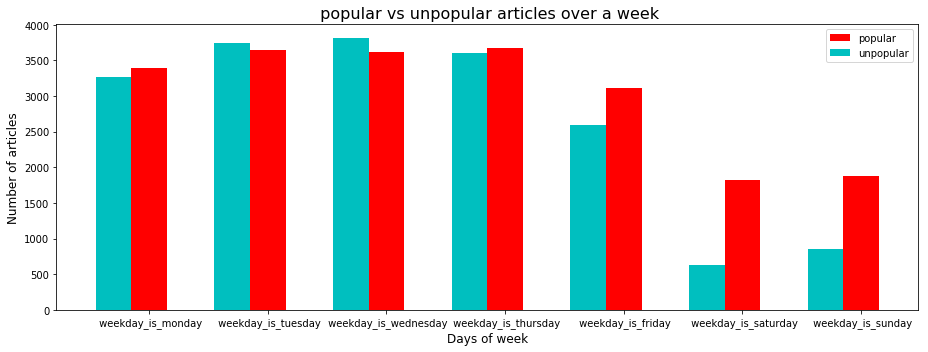

In [14]:
# Show the relationship between weekdays and popularity of articles
columns_day = features.columns.values[29:36]
unpop=data[data[' shares']<1400]
pop=data[data[' shares']>=1400]
unpop_day = unpop[columns_day].sum().values
pop_day = pop[columns_day].sum().values

import matplotlib.pyplot as pl
from IPython import get_ipython
get_ipython().run_line_magic('matplotlib', 'inline')

fig = pl.figure(figsize = (13,5))
pl.title(" popular vs unpopular articles over a week", fontsize = 16)
pl.bar(np.arange(len(columns_day)), pop_day, width = 0.3, align="center", color = 'r', \
          label = "popular")
pl.bar(np.arange(len(columns_day)) - 0.3, unpop_day, width = 0.3, align = "center", color = 'c', \
          label = "unpopular")
pl.xticks(np.arange(len(columns_day)), columns_day)
pl.ylabel("Number of articles", fontsize = 12)
pl.xlabel("Days of week", fontsize = 12)
    
pl.legend(loc = 'upper right')
pl.tight_layout()
pl.savefig("days.pdf")
pl.show()

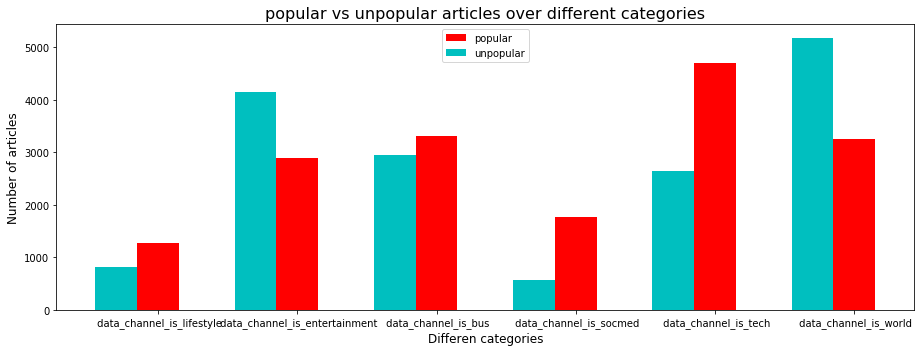

In [15]:
# Show the relationship between categories and popularity of articles
columns_chan=features.columns.values[11:17]
unpop_chan = unpop[columns_chan].sum().values
pop_chan = pop[columns_chan].sum().values
fig = pl.figure(figsize = (13,5))
pl.title("popular vs unpopular articles over different categories", fontsize = 16)
pl.bar(np.arange(len(columns_chan)), pop_chan, width = 0.3, align="center", color = 'r', \
          label = "popular")
pl.bar(np.arange(len(columns_chan)) - 0.3, unpop_chan, width = 0.3, align = "center", color = 'c', \
          label = "unpopular")
pl.xticks(np.arange(len(columns_chan)), columns_chan)

pl.ylabel("Number of articles", fontsize = 12)
pl.xlabel("Differen categories", fontsize = 12)
    
pl.legend(loc = 'upper center')
pl.tight_layout()
pl.savefig("categories.pdf")
pl.show()

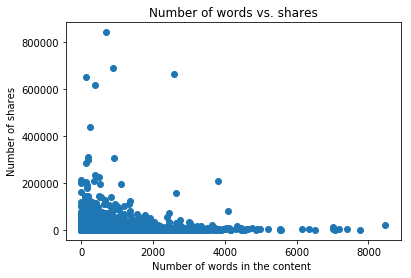

In [16]:
columns_content = data.iloc[:,3]
shares = data.iloc[:,60]
x = columns_content
y = shares
pl.scatter(x, y, marker='o')
pl.title("Number of words vs. shares", fontsize = 12)
pl.xlabel("Number of words in the content ")
pl.ylabel("Number of shares")
pl.show()



In [17]:
# Normalize the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
features.loc[0:59] = scaler.fit_transform(features.loc[0:59])
display(features.head(n=1))

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
0,0.75,0.105995,0.637571,0.663952,0.742012,0.148148,0.083333,0.02381,0.0,0.444048,...,0.548727,0.181818,0.538462,0.25,0.4,0.5,0.5,0.40625,0.0,0.1875


In [18]:
# Feature selection by using RFECV
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# Apply Logistic Regression
estimator_LR = LogisticRegression(random_state=0)
selector_LR = RFECV(estimator_LR, step=1, cv=5)
selector_LR = selector_LR.fit(features, popular_label)
# Apply Decision-Tree Classifier
estimator_DT = DecisionTreeClassifier()
selector_DT = RFECV(estimator_DT, step=1, cv=5)
selector_DT = selector_DT.fit(features, popular_label)

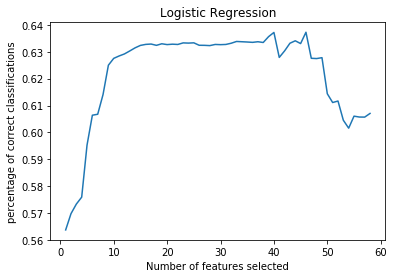

46
[' n_tokens_title' ' n_tokens_content' ' n_unique_tokens'
 ' n_non_stop_words' ' num_hrefs' ' num_self_hrefs' ' num_imgs'
 ' num_videos' ' average_token_length' ' num_keywords'
 ' data_channel_is_entertainment' ' data_channel_is_bus'
 ' data_channel_is_socmed' ' data_channel_is_tech'
 ' data_channel_is_world' ' kw_min_min' ' kw_avg_min' ' kw_min_avg'
 ' kw_max_avg' ' kw_avg_avg' ' self_reference_min_shares'
 ' self_reference_avg_sharess' ' weekday_is_monday' ' weekday_is_tuesday'
 ' weekday_is_wednesday' ' weekday_is_thursday' ' weekday_is_friday'
 ' weekday_is_saturday' ' weekday_is_sunday' ' is_weekend' ' LDA_00'
 ' LDA_01' ' LDA_02' ' LDA_03' ' LDA_04' ' global_subjectivity'
 ' global_sentiment_polarity' ' rate_negative_words'
 ' avg_positive_polarity' ' min_positive_polarity'
 ' max_positive_polarity' ' avg_negative_polarity'
 ' min_negative_polarity' ' max_negative_polarity'
 ' title_sentiment_polarity' ' abs_title_subjectivity']


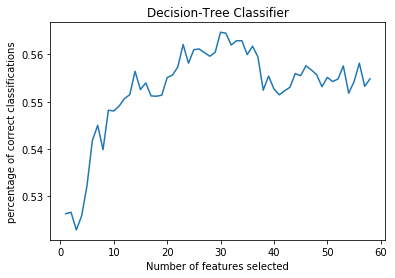

30
[' n_tokens_title' ' n_tokens_content' ' n_unique_tokens'
 ' n_non_stop_unique_tokens' ' num_hrefs' ' average_token_length'
 ' kw_max_min' ' kw_avg_min' ' kw_min_max' ' kw_avg_max' ' kw_min_avg'
 ' kw_max_avg' ' kw_avg_avg' ' self_reference_min_shares'
 ' self_reference_max_shares' ' self_reference_avg_sharess' ' is_weekend'
 ' LDA_00' ' LDA_01' ' LDA_02' ' LDA_03' ' LDA_04' ' global_subjectivity'
 ' global_sentiment_polarity' ' global_rate_positive_words'
 ' global_rate_negative_words' ' rate_negative_words'
 ' avg_positive_polarity' ' avg_negative_polarity'
 ' title_sentiment_polarity']
23
[' self_reference_min_shares', ' kw_avg_avg', ' n_tokens_title', ' global_sentiment_polarity', ' LDA_02', ' n_tokens_content', ' kw_avg_min', ' average_token_length', ' LDA_00', ' rate_negative_words', ' LDA_03', ' n_unique_tokens', ' is_weekend', ' kw_max_avg', ' LDA_01', ' title_sentiment_polarity', ' LDA_04', ' self_reference_avg_sharess', ' num_hrefs', ' avg_positive_polarity', ' avg_negativ

In [20]:
# Show the relationship between number of features selected and prediction accuracy
pl.figure()
pl.xlabel("Number of features selected")
pl.ylabel("percentage of correct classifications")
pl.plot(range(1, len(selector_LR.grid_scores_) + 1), selector_LR.grid_scores_)
pl.title("Logistic Regression")
pl.savefig('RFE_LR.pdf')
pl.show()

# Show the features that produce highest accuracy for LR
print(features.columns.values[selector_LR.ranking_==1].shape[0])
lst = features.columns.values[selector_LR.ranking_==1]
print(lst)

pl.figure()
pl.xlabel("Number of features selected")
pl.ylabel("percentage of correct classifications")
pl.plot(range(1, len(selector_DT.grid_scores_) + 1), selector_DT.grid_scores_)
pl.title("Decision-Tree Classifier")
pl.savefig('RFE_DT.pdf')
pl.show()

# Show the features that produce highest accuracy for DT Classifier
print(features.columns.values[selector_DT.ranking_==1].shape[0])
lst1 = features.columns.values[selector_DT.ranking_==1]
print(lst1)

# Find and show the intersection of two lists of features
key_features = list(set(lst).intersection(lst1))
print(len(key_features))
print(key_features)

In [21]:
from scipy.stats.stats import pearsonr

# Get columns index corresponds to features
index = [data.columns.get_loc(c) for c in data.columns if c in features]

zip_lst = zip(key_features,index)
corr_lst = []
shares = data.iloc[:,60]

for x in zip_lst:
    feature = data.iloc[:,x[1]]
    corr = pearsonr(feature,shares)[0]
    corr_lst += [(x[0],corr)]
    
corr_lst = sorted(corr_lst, key = lambda x: x[1],reverse=True)
names = [x[0] for x in corr_lst]
corrs = [x[1] for x in corr_lst]

df = pd.DataFrame({"Features":names,"PCC":corrs})

df


,Features,PCC
0,n_tokens_content,0.045404
1,kw_min_avg,0.044686
2,average_token_length,0.039388
3,avg_positive_polarity,0.030406
4,num_hrefs,0.030114
5,LDA_00,0.023936
6,LDA_03,0.021818
7,self_reference_min_shares,0.008783
8,global_subjectivity,0.007863
9,n_unique_tokens,0.005831
